In [60]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

In [61]:
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')


#check unique type
raw_eqk.type.unique()


eqk = raw_eqk[(raw_eqk.type=="earthquake")&(raw_eqk.mag >= 6.5)]
eqk.head()


,time,latitude,longitude,depth,mag,id,place,type
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake


In [62]:

eqk  = gpd.GeoDataFrame(eqk, geometry = gpd.points_from_xy(eqk.longitude,eqk.latitude), crs = 4326)


eqk.crs



<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

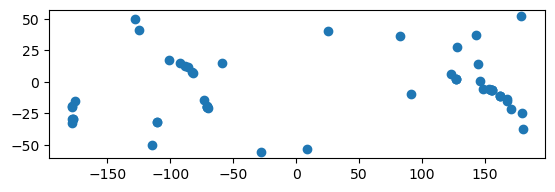

In [63]:
eqk.plot()

In [64]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


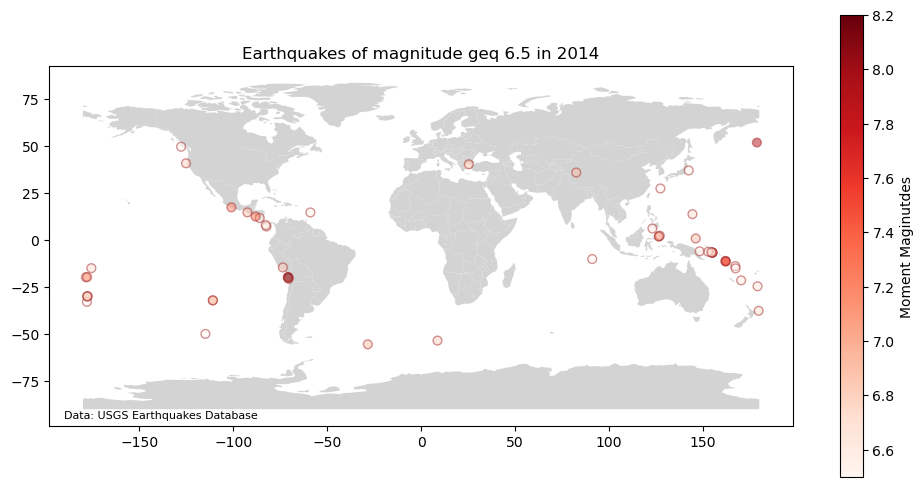

In [123]:
fig, ax = plt.subplots(figsize=(12, 6))

# add eqk
worldmap.plot(ax=ax,
            color='lightgrey',
            edgecolor = 'none')

eqk.plot(ax=ax, 
                  column='mag', 
                  legend=True,    # add legend
                  markersize = 40, # adjust point size
                  alpha=0.5,
                  edgecolor = "brown",
                  cmap='Reds', 
        legend_kwds = {'label':'Moment Maginutdes', 'orientation':'vertical'})
plt.title("Earthquakes of magnitude geq 6.5 in 2014")
plt.text(-190, -95, "Data: USGS Earthquakes Database", fontsize=8)
plt.show()


